# EDA & Modelling

## Package loading

In [78]:
from EZS_deps.EZS_func import *
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
import math
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.neighbors import LocalOutlierFactor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.inspection import permutation_importance
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel
from sklearn.gaussian_process.kernels import ConstantKernel
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import DotProduct
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import set_config
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from pandas.api.types import is_numeric_dtype
from itertools import product
from joblib import dump
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer


## Exploratory Data Analysis 

### File and parameters loading

In [79]:
problem_type = 'regression'

In [80]:
stacking = 'True'

In [81]:
data_size = 'small'

In [82]:
df = pd.read_csv('/home/phbillet/Documents/python project/EZStacking-main/dataset/concrete_miss.csv')

In [83]:
target_col = 'Strength'

#### Thresholds

In [84]:
threshold_NaN = 0.5

In [85]:
threshold_cat = 5

In [86]:
threshold_Z = 3.0

In [87]:
test_size = 0.33

In [88]:
threshold_entropy = 0.75

In [89]:
threshold_corr = 0.95

In [90]:
threshold_model = 5

In [91]:
threshold_score = 0.7

In [92]:
threshold_feature = 5

#### Drop user's columns:
_Notes:_
*  $R^2$ at the end of the 1st round :
|train |test |
|------|-----|
|0.982191 | 0.899776|
* After 1st round, feature elimination indicates, that the following columns can be suppressed.
*  $R^2$ at the end of the 2nd round :
|train |test |
|------|-----|
|0.973120 | 0.898954|

In [93]:
user_drop_cols = ['CoarseAggregate', 'FineAggregate', 'FlyAsh']

Dataset before deletion

In [94]:
display(df)

Cement  BlastFurnaceSlag  FlyAsh  Water  Superplasticizer  \
0      540.0               0.0     0.0  162.0               2.5   
1      540.0               0.0     0.0  162.0               2.5   
2      332.5             142.5     0.0  228.0               0.0   
3      332.5             142.5     0.0  228.0               0.0   
4      198.6               NaN     0.0  192.0               0.0   
...      ...               ...     ...    ...               ...   
1025   276.4             116.0    90.3  179.6               8.9   
1026   322.2               0.0   115.6  196.0              10.4   
1027   148.5             139.4   108.6  192.7               6.1   
1028   159.1             186.7     0.0  175.6              11.3   
1029   260.9             100.5    78.3  200.6               8.6   

      CoarseAggregate  FineAggregate  Age   Strength  
0              1040.0          676.0   28  79.986111  
1              1055.0          676.0   28  61.887366  
2               932.0          594.0  270  40.269535  
3               932.0          594.0  365  41.052780  
4               978.4          825.5  360  44.296075  
...               ...            ...  ...        ...  
1025            870.1          768.3   28  44.284354  
1026            817.9          813.4   28  31.178794  
1027            892.4          780.0   28  23.696601  
1028            989.6          788.9   28  32.768036  
1029            864.5          761.5   28  32.401235  

[1030 rows x 9 columns]

In [95]:
df = df.drop(user_drop_cols, axis=1)

Dataset after deletion

In [96]:
display(df)

Cement  BlastFurnaceSlag  Water  Superplasticizer  Age   Strength
0      540.0               0.0  162.0               2.5   28  79.986111
1      540.0               0.0  162.0               2.5   28  61.887366
2      332.5             142.5  228.0               0.0  270  40.269535
3      332.5             142.5  228.0               0.0  365  41.052780
4      198.6               NaN  192.0               0.0  360  44.296075
...      ...               ...    ...               ...  ...        ...
1025   276.4             116.0  179.6               8.9   28  44.284354
1026   322.2               0.0  196.0              10.4   28  31.178794
1027   148.5             139.4  192.7               6.1   28  23.696601
1028   159.1             186.7  175.6              11.3   28  32.768036
1029   260.9             100.5  200.6               8.6   28  32.401235

[1030 rows x 6 columns]

#### Dataset copy

In [97]:
df_copy = df.copy()

### Dataset Information

In [98]:
df.shape

(1030, 6)

#### Some records

In [99]:
display(df)

Cement  BlastFurnaceSlag  Water  Superplasticizer  Age   Strength
0      540.0               0.0  162.0               2.5   28  79.986111
1      540.0               0.0  162.0               2.5   28  61.887366
2      332.5             142.5  228.0               0.0  270  40.269535
3      332.5             142.5  228.0               0.0  365  41.052780
4      198.6               NaN  192.0               0.0  360  44.296075
...      ...               ...    ...               ...  ...        ...
1025   276.4             116.0  179.6               8.9   28  44.284354
1026   322.2               0.0  196.0              10.4   28  31.178794
1027   148.5             139.4  192.7               6.1   28  23.696601
1028   159.1             186.7  175.6              11.3   28  32.768036
1029   260.9             100.5  200.6               8.6   28  32.401235

[1030 rows x 6 columns]

#### Dataframe structure

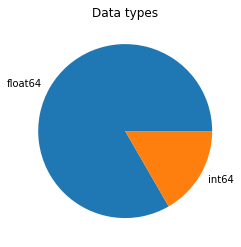

In [100]:
plot_dataframe_structure(df)

#### Dataframe statistics

In [101]:
display(df.describe().T)

count        mean         std         min         25%  \
Cement             988.0  280.736063  104.520393  102.000000  192.000000   
BlastFurnaceSlag   973.0   73.633515   86.586068    0.000000    0.000000   
Water             1030.0  181.566359   21.355567  121.750000  164.900000   
Superplasticizer  1030.0    6.203112    5.973492    0.000000    0.000000   
Age               1030.0   45.662136   63.169912    1.000000    7.000000   
Strength          1030.0   35.817836   16.705679    2.331808   23.707115   

                         50%         75%         max  
Cement            272.800000  350.000000  540.000000  
BlastFurnaceSlag   22.000000  142.500000  359.400000  
Water             185.000000  192.000000  247.000000  
Superplasticizer    6.350000   10.160000   32.200000  
Age                28.000000   56.000000  365.000000  
Strength           34.442774   46.136287   82.599225

#### Which columns could be categorical ?

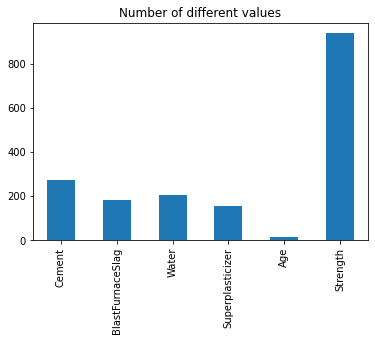

In [102]:
plot_categorical(df)

### Dataset Cleaning

#### Duplicate rows:

In [103]:
duplicates(df)

Number of rows before removing: 988
Number of duplicate rows: 22
Number of rows after removing: 966


Cement  BlastFurnaceSlag  Water  Superplasticizer  Age   Strength
0      540.0               0.0  162.0               2.5   28  79.986111
1      540.0               0.0  162.0               2.5   28  61.887366
2      332.5             142.5  228.0               0.0  270  40.269535
3      332.5             142.5  228.0               0.0  365  41.052780
4      198.6               NaN  192.0               0.0  360  44.296075
...      ...               ...    ...               ...  ...        ...
1025   276.4             116.0  179.6               8.9   28  44.284354
1026   322.2               0.0  196.0              10.4   28  31.178794
1027   148.5             139.4  192.7               6.1   28  23.696601
1028   159.1             186.7  175.6              11.3   28  32.768036
1029   260.9             100.5  200.6               8.6   28  32.401235

[1008 rows x 6 columns]

#### Drop NaN:

In [104]:
df, drop_cols = drop_na(df, threshold_NaN)

Drop columns containing more than 50.0 % of NaN: []


Set of dropped columns: NaN

In [105]:
dropped_cols = np.unique(np.concatenate((drop_cols, user_drop_cols)))

In [106]:
display(dropped_cols)

array(['CoarseAggregate', 'FineAggregate', 'FlyAsh'], dtype=object)

#### Encoding data:

In [107]:
df, encoded_cols = encoding(df, threshold_cat, target_col)

Encoding numeric column: Cement
Encoding numeric column: BlastFurnaceSlag
Encoding numeric column: Water
Encoding numeric column: Superplasticizer
Encoding numeric column: Age
Encoding numeric column: Strength


#### Imputing NaN using IterativeImputer

##### Imputation

In [108]:
df = imputation(df)

Imputing NaN using IterativeImputer


#### Data compression:

In [109]:
df = downcast_dtypes(df)

Memory usage of dataframe is 0.05MB
Memory usage after optimization is: 0.01MB
Decreased by 74.8%


##### Dataframe structure after compression

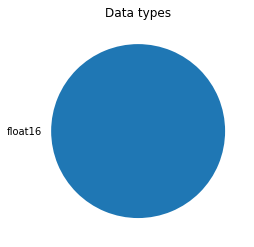

In [110]:
plot_dataframe_structure(df)

#### Outliers:

In [111]:
df = outliers(df, threshold_Z)

Using Z_score,  49  rows will be suppressed.


#### Correlation

In [112]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

In [113]:
correlated_features = correlated_columns(df, threshold_corr, target_col) 
dropped_cols = np.unique(np.concatenate((drop_cols, correlated_features)))

#### Check columns that should be dropped

In [114]:
print(dropped_cols)

[]


## Splittings 

In [115]:
df = df_copy

#### Splitting dataframe in features and targets

In [116]:
y = df[target_col]

In [117]:
X = df.drop(target_col, axis=1)

##### Dimensions

In [118]:
nb_features = len(X.columns.tolist())

In [119]:
nb_targets = 1

In [120]:
layer_size = nb_features + nb_targets + 2

##### Splitting data in train and test sets 

In [121]:
X_train, X_test, y_train, y_test = split(X, y, test_size=test_size, threshold_entropy=threshold_entropy)

## Modelling

### Model building

#### Pipeline building

##### Select the categorical and numerical columns

In [122]:
cat_selector = make_column_selector(dtype_include=object)

In [123]:
num_selector = make_column_selector(dtype_include=np.number)

##### For models based on tree

In [124]:
cat_tree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

In [125]:
num_tree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True))

In [126]:
tree_preprocessor = make_pipeline(make_column_transformer((num_tree_processor, num_selector), (cat_tree_processor, cat_selector)), Decorrelator(threshold_corr))

##### For models not based on tree

In [127]:
cat_ntree_processor = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore', sparse=False))

In [128]:
num_ntree_processor = make_pipeline(SimpleImputer(strategy='mean', add_indicator=True), StandardScaler())

In [129]:
ntree_preprocessor = make_pipeline(make_column_transformer((num_ntree_processor, num_selector), (cat_ntree_processor, cat_selector)), Decorrelator(threshold_corr))

##### Level-0 models

In [130]:
level_0 = [ 
          ('GPRL', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * DotProduct() + ConstantKernel() + WhiteKernel()))), 
          ('GPRR', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * RBF() + ConstantKernel() + WhiteKernel()))), 
          ('GPRQ', make_pipeline(ntree_preprocessor, GaussianProcessRegressor(kernel = ConstantKernel() * RationalQuadratic() + ConstantKernel() + WhiteKernel()))), 
          ('DTRF', make_pipeline(ntree_preprocessor, DecisionTreeRegressor(criterion='friedman_mse'))), 
          ('DTRA', make_pipeline(ntree_preprocessor, DecisionTreeRegressor(criterion='absolute_error'))), 
          ('DTRP', make_pipeline(ntree_preprocessor, DecisionTreeRegressor(criterion='poisson'))), 
          ('RFRS', make_pipeline(ntree_preprocessor, RandomForestRegressor(criterion='squared_error', n_estimators=50))), 
          ('RFRA', make_pipeline(ntree_preprocessor, RandomForestRegressor(criterion='absolute_error', n_estimators=50))), 
          ('RFRP', make_pipeline(ntree_preprocessor, RandomForestRegressor(criterion='poisson', n_estimators=50))), 
          ('ABR', make_pipeline(ntree_preprocessor, AdaBoostRegressor())), 
          ('HGBR', make_pipeline(ntree_preprocessor, HistGradientBoostingRegressor(early_stopping=True))), 
          ('ELNE', make_pipeline(ntree_preprocessor, ElasticNet(alpha=0.01, l1_ratio=0.15))), 
          ('ELNECV', make_pipeline(ntree_preprocessor, ElasticNetCV(cv=5))), 
          ('LINR', make_pipeline(ntree_preprocessor, LinearRegression())), 
          ('MLPR10', make_pipeline(ntree_preprocessor, MLPRegressor(hidden_layer_sizes = (10 * layer_size, 10 * layer_size,), max_iter=1000, early_stopping=True))), 
          ('MLPR20', make_pipeline(ntree_preprocessor, MLPRegressor(hidden_layer_sizes = (20 * layer_size, 20 * layer_size,), max_iter=1000, early_stopping=True))), 
          ('KNRU', make_pipeline(ntree_preprocessor, KNeighborsRegressor(weights='uniform'))), 
          ('KNRD', make_pipeline(ntree_preprocessor, KNeighborsRegressor(weights='distance'))), 
          ]

##### Level-1 model

In [131]:
level_1 = ElasticNetCV(cv=5, n_jobs=-1)

##### Stacking for regression

In [132]:
model = StackingRegressor(level_0, final_estimator=level_1, n_jobs=-1)

### Model fitting

In [133]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

/opt/anaconda3/envs/EZStacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/envs/EZStacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/opt/anaconda3/envs/EZStacking/lib/python3.10/site-packages/sklearn/utils/extmath.py:1016: RuntimeWarning: invalid value encountered in divide
  * (last_sum / last_over_new_count - new_sum) ** 2
/opt/anaconda3/envs/EZStacking/lib/python3.10/site-packages/sklearn/gaussian_process/kernels.py:430: ConvergenceWarning: The optimal value found for di

CPU times: user 859 ms, sys: 186 ms, total: 1.04 s
Wall time: 39.2 s


StackingRegressor(estimators=[('GPRL',
                               Pipeline(steps=[('pipeline',
                                                Pipeline(steps=[('columntransformer',
                                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                                   SimpleImputer(add_indicator=True)),
                                                                                                                  ('standardscaler',
                                                                                                                   StandardScaler())]),
                                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7a00d49180>),
                                                                                                 ('pipeline-2'...
                                                                                                                   SimpleImputer(strategy='most_frequent')),
                                                                                                                  ('onehotencoder',
                                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                                 sparse=False))]),
                                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7a00d4be20>)])),
                                                                ('decorrelator',
                                                                 Decorrelator(threshold=0.95))])),
                                               ('kneighborsregressor',
                                                KNeighborsRegressor(weights='distance'))]))],
                  final_estimator=ElasticNetCV(cv=5, n_jobs=-1), n_jobs=-1)

### Model evaluation

#### Model scoring

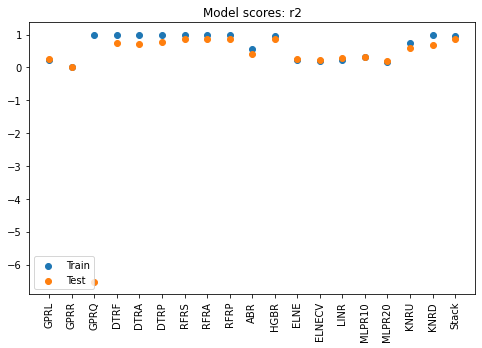

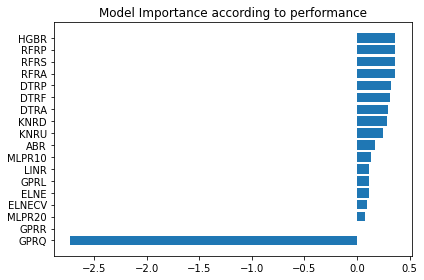

In [134]:
score_stack, mod_imp_score = score_stacking(model, X_train, y_train, X_test, y_test)

#### Model importance

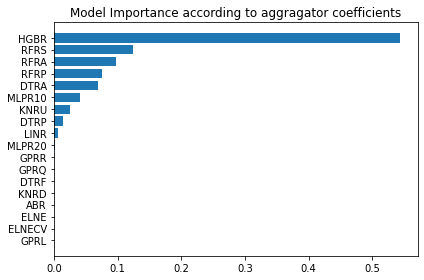

In [135]:
model_imp = plot_model_importance(model)

#### Feature permutation importance (a posteriori)

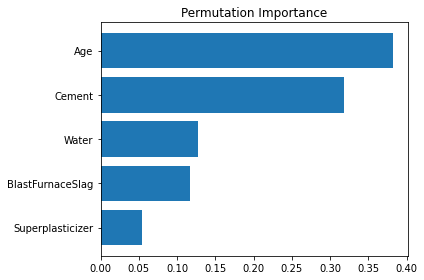

array([['Superplasticizer', 0.05465631571565958],
       ['BlastFurnaceSlag', 0.11744276732491774],
       ['Water', 0.12701719076181034],
       ['Cement', 0.31829239791670133],
       ['Age', 0.3825913282809111]], dtype=object)

In [136]:
plot_perm_importance(model, X_test, y_test)

#### Partial Dependence & Individual Conditional Expectation 

##### Features of interest

In [137]:
features_of_interest = []

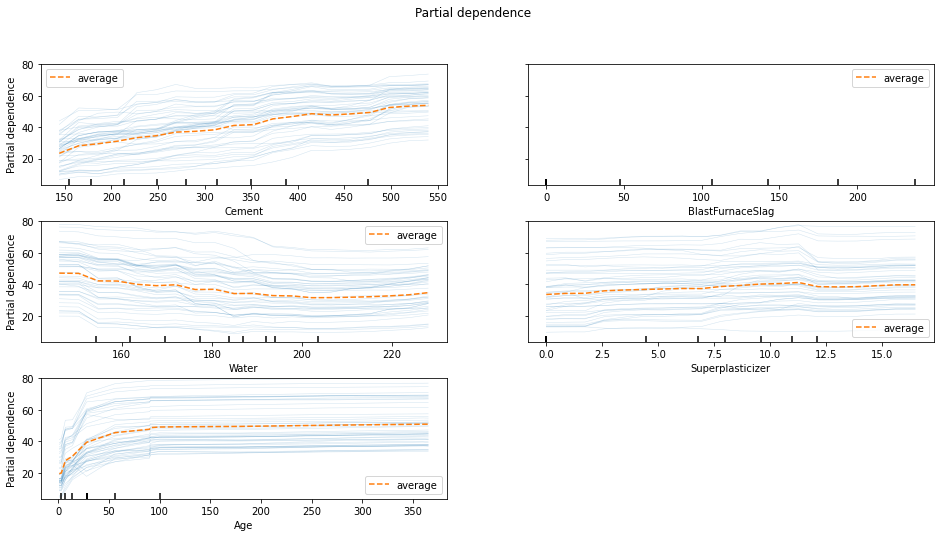

In [138]:
plot_partial_dependence(model, X_train, features_of_interest)

#### $R^2$ score

In [139]:
K_r2(model,X_train, y_train, X_test, y_test)

### Final Model

In [140]:
threshold_model = 5

In [141]:
threshold_score = 0.7

##### Filtered Level-0 models

In [142]:
level_0_f = model_filtering(level_0, model_imp, threshold_model, score_stack, threshold_score)

##### Final Level-1 model

In [143]:
level_1 = ElasticNetCV(cv=5, n_jobs=-1)

##### Build final model

In [144]:
model = StackingRegressor(level_0_f, final_estimator=level_1, n_jobs=-1)

### Final Model fitting

In [145]:
%%time 
set_config(display='diagram') 
model.fit(X_train, y_train)

CPU times: user 162 ms, sys: 25.2 ms, total: 187 ms
Wall time: 4.21 s


StackingRegressor(estimators=[('DTRA',
                               Pipeline(steps=[('pipeline',
                                                Pipeline(steps=[('columntransformer',
                                                                 ColumnTransformer(transformers=[('pipeline-1',
                                                                                                  Pipeline(steps=[('simpleimputer',
                                                                                                                   SimpleImputer(add_indicator=True)),
                                                                                                                  ('standardscaler',
                                                                                                                   StandardScaler())]),
                                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7a00d49180>),
                                                                                                 ('pipeline-2'...
                                                                                                                  ('onehotencoder',
                                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                                 sparse=False))]),
                                                                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7a00d4be20>)])),
                                                                ('decorrelator',
                                                                 Decorrelator(threshold=0.95))])),
                                               ('histgradientboostingregressor',
                                                HistGradientBoostingRegressor(early_stopping=True))]))],
                  final_estimator=ElasticNetCV(cv=5, n_jobs=-1), n_jobs=-1)

#### Final Model scoring

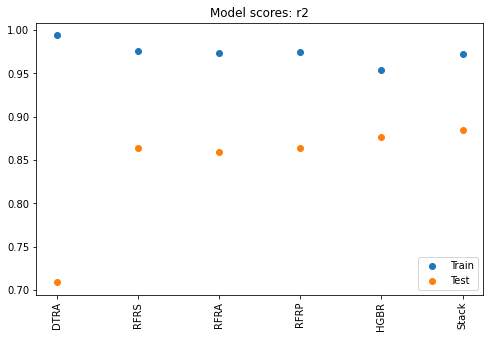

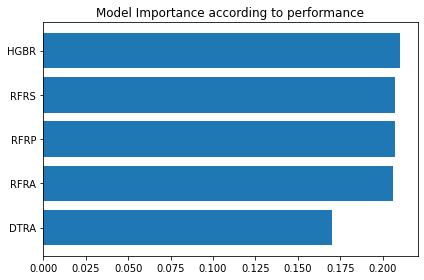

(array([['DTRA', 0.9937305964268194, 0.7089823026073006],
        ['RFRS', 0.9756675152433554, 0.8643293146073121],
        ['RFRA', 0.9730395168183996, 0.8595436895410635],
        ['RFRP', 0.9742253336869109, 0.8637727439838582],
        ['HGBR', 0.9543638462126269, 0.8764505706614695],
        ['Stack', 0.971881130218745, 0.8844821055684959]], dtype=object),
 array([['DTRA', 0.16989430751948736],
        ['RFRA', 0.20597351919827808],
        ['RFRP', 0.2069869327537061],
        ['RFRS', 0.20712030446172994],
        ['HGBR', 0.2100249360667985]], dtype=object))

In [146]:
score_stacking(model, X_train, y_train, X_test, y_test)

#### Final feature permutation importance

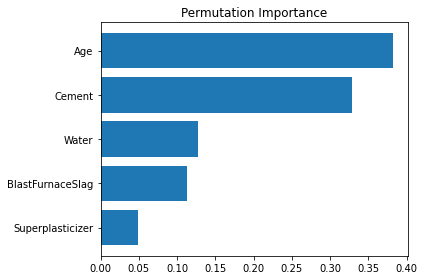

In [147]:
feature_importance = plot_perm_importance(model, X_test, y_test)

##### Final feature elimination

In [148]:
best_feature, worst_feature = feature_filtering(feature_importance, threshold_feature)

In [149]:
dropped_cols = np.unique(np.concatenate((dropped_cols, worst_feature))).tolist()

#### Check those columns, they should be dropped

In [150]:
print(dropped_cols)

[]


#### Final $R^2$ score

In [151]:
K_r2(model,X_train, y_train, X_test, y_test)

## Deployment

### Save your model

In [152]:
model_name = 'model.sav' 
dump(model, model_name)

['model.sav']

### Generate your server

In [153]:
fastapi_server(model, 'model.sav', X, y)

### [Test your API](./server.ipynb)